# Smoothing and simplifying surfaces

When working with surface meshes, it is a common task to simplify these meshes to enable their analysis. Also smoothing them might be necessary, for example to avoid measuring voxel-lated structures.

In [1]:
import napari_process_points_and_surfaces as nppas
import vedo

Our starting point is the simulated branchoid we saved to disk earlier in this chapter.

(array([[25.5, 44. , 47. ],
        [26. , 43.5, 47. ],
        [26. , 44. , 46.5],
        ...,
        [74.5, 56. , 51. ],
        [74.5, 56. , 52. ],
        [74.5, 56. , 53. ]], dtype=float32),
 array([[    2,     1,     0],
        [    4,     3,     0],
        [    4,     0,     1],
        ...,
        [19038, 18870, 18872],
        [19038, 18872, 19039],
        [19039, 18872, 18852]], dtype=int64))
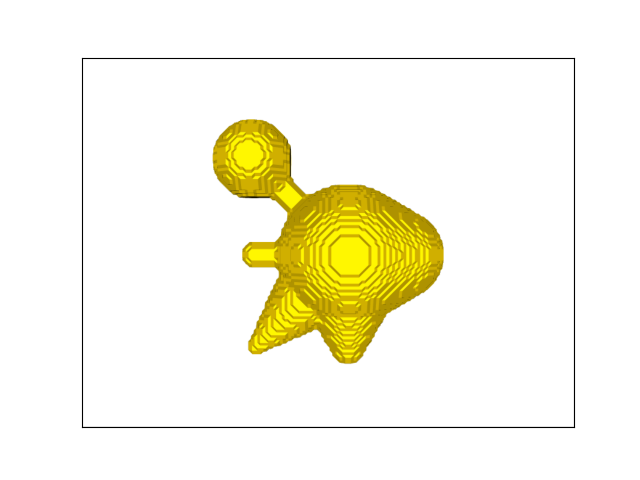

In [2]:
mesh = vedo.load("../../data/branchoid.ply")
surface = nppas.to_napari_surface_data(mesh)
surface

## Smoothing meshes
The circular structures you see in this dataset result from the origin of the data: The surface was created from a binary image. The lines correspond to voxel edges. Measuring the surface area would be misleading. Thus, we need to smooth the dataset before doing quantitative measurements.

(array([[25.8801  , 44.178448, 46.409103],
        [25.98807 , 43.647034, 46.834126],
        [25.66813 , 44.284664, 47.229954],
        ...,
        [74.374275, 55.870167, 50.97586 ],
        [74.372375, 55.849792, 51.9754  ],
        [74.33187 , 55.632175, 53.02567 ]], dtype=float32),
 array([[    0,     1,     2],
        [    3,     4,     2],
        [    3,     2,     1],
        ...,
        [19038, 18871, 18873],
        [19038, 18873, 19039],
        [19039, 18873, 18852]], dtype=int64))
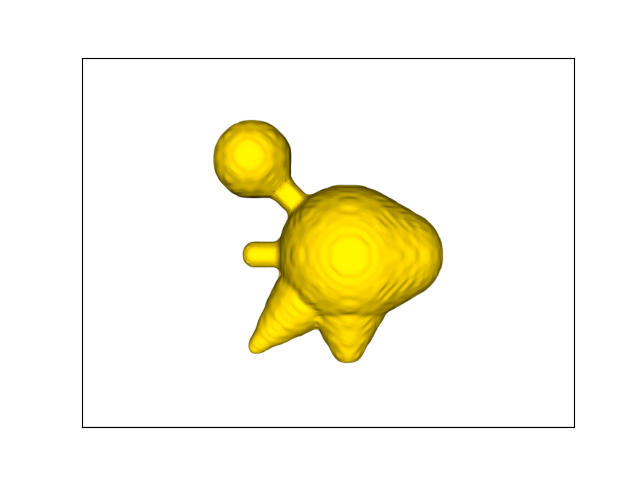

In [3]:
smoothed_surface = nppas.smooth_surface(surface)
smoothed_surface

We can also modify how fine the smoothing is applied.

(array([[25.876875, 44.27774 , 46.330605],
        [25.971485, 43.719704, 46.732815],
        [25.723366, 44.443665, 47.23411 ],
        ...,
        [74.32864 , 55.820503, 50.877747],
        [74.31066 , 55.738045, 51.88742 ],
        [74.276634, 55.50889 , 52.960915]], dtype=float32),
 array([[    0,     1,     2],
        [    3,     4,     2],
        [    3,     2,     1],
        ...,
        [19038, 18871, 18873],
        [19038, 18873, 19039],
        [19039, 18873, 18852]], dtype=int64))
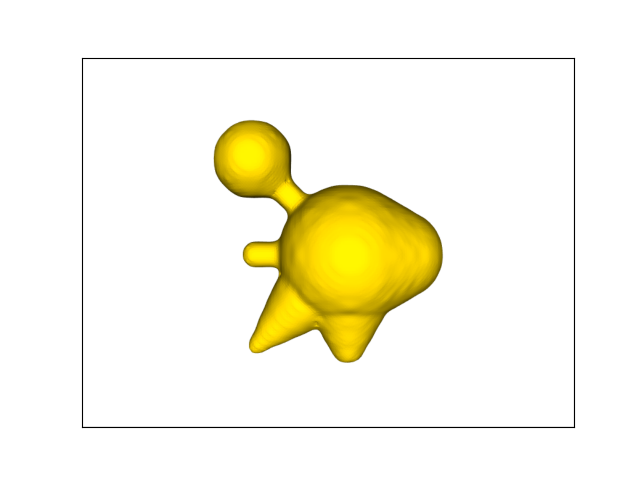

In [4]:
smoothed_surface2 = nppas.smooth_surface(surface, pass_band=0.01)
smoothed_surface2

The parameters also allow to remove local structure, in particular the number of iterations.

(array([[28.019161, 46.668327, 48.092934],
        [28.084337, 46.248135, 48.33528 ],
        [27.932276, 46.792118, 48.730152],
        ...,
        [71.99732 , 53.424328, 49.847355],
        [72.04024 , 53.235012, 50.53048 ],
        [72.06986 , 52.989563, 51.258373]], dtype=float32),
 array([[    0,     1,     2],
        [    3,     4,     2],
        [    3,     2,     1],
        ...,
        [19038, 18871, 18873],
        [19038, 18873, 19039],
        [19039, 18873, 18852]], dtype=int64))
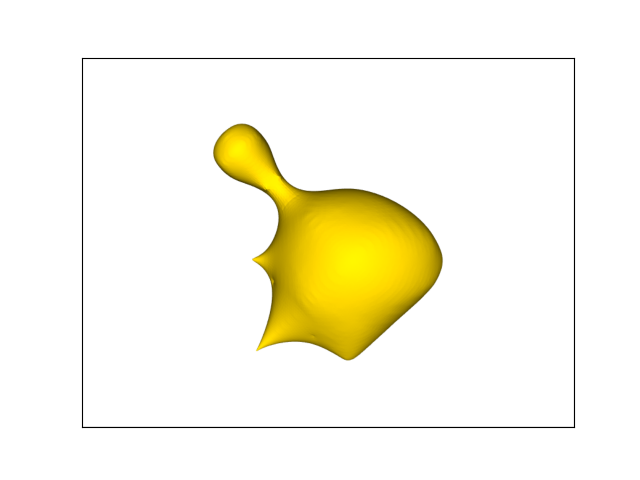

In [5]:
smoothed_surface3 = nppas.smooth_surface(surface, number_of_iterations=100,
                                         pass_band=0.00001, 
                                        )
smoothed_surface3

There are also more functions for smoothing surfaces, e.g. based on [moving least squares](https://en.wikipedia.org/wiki/Moving_least_squares).

 ━━━━━━━━━━━━━━━━━━━━━━ elapsed: 5s (3714.7 it/s)             (3707.5 it/s)         working ...


(array([[25.98875 , 44.12809 , 47.057686],
        [26.15397 , 43.54473 , 47.020836],
        [26.077953, 44.021046, 46.511963],
        ...,
        [74.10477 , 55.90134 , 50.989483],
        [74.068146, 55.883648, 51.968372],
        [74.0037  , 55.863758, 52.942482]], dtype=float32),
 array([[    2,     1,     0],
        [    4,     3,     0],
        [    4,     0,     1],
        ...,
        [19038, 18870, 18872],
        [19038, 18872, 19039],
        [19039, 18872, 18852]], dtype=int64))
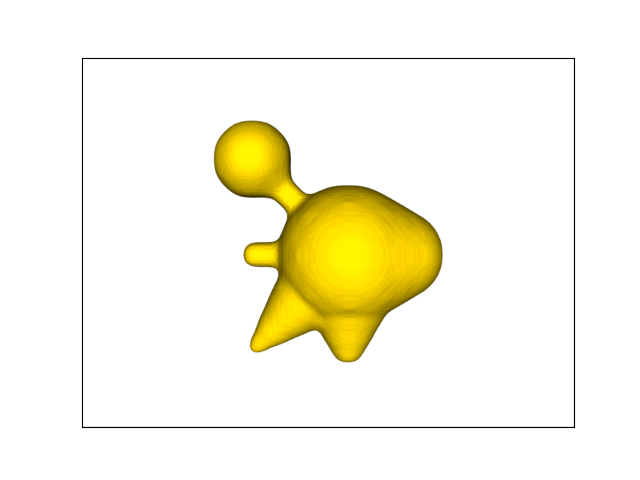

In [6]:
nppas.smooth_surface_moving_least_squares_2d(surface, smoothing_factor=0.2)

 ━━━━━━━━━━━━━━━━━━━━━━ elapsed: 5s (3572.6 it/s)             (3577.5 it/s)         working ...


(array([[25.98293 , 44.12884 , 47.057266],
        [26.142307, 43.538788, 47.017857],
        [26.082615, 44.023262, 46.51221 ],
        ...,
        [74.13081 , 55.896233, 50.99272 ],
        [74.08871 , 55.884872, 51.97385 ],
        [74.017075, 55.87116 , 52.942734]], dtype=float32),
 array([[    2,     1,     0],
        [    4,     3,     0],
        [    4,     0,     1],
        ...,
        [19038, 18870, 18872],
        [19038, 18872, 19039],
        [19039, 18872, 18852]], dtype=int64))
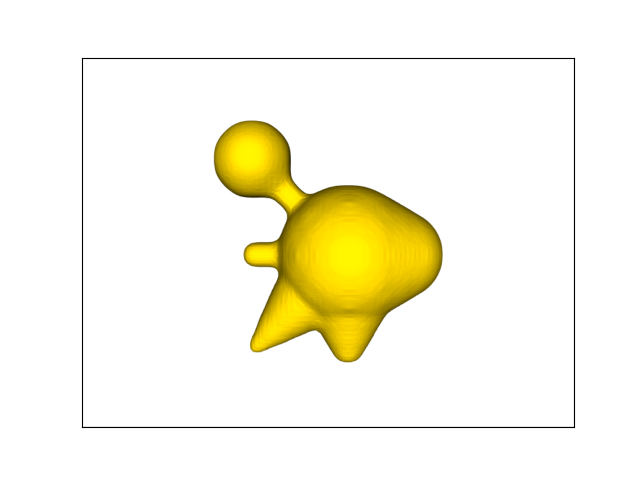

In [7]:
nppas.smooth_surface_moving_least_squares_2d_radius(surface, smoothing_factor=0.2, radius=3)

## Simplifying surfaces meshes
In case a surface mesh has too many vertices and faces, processing it may take long time. Too detailed surfaces mesh may not bring additional information as well. Thus, it might make sense to simplify surfaces, for example by reducing the number of vertices and faces by half.

(array([[25.8801  , 44.178448, 46.409103],
        [25.66813 , 44.284664, 47.229954],
        [25.627625, 44.145462, 48.30988 ],
        ...,
        [74.374275, 55.870167, 50.97586 ],
        [74.372375, 55.849792, 51.9754  ],
        [74.33187 , 55.632175, 53.02567 ]], dtype=float32),
 array([[ 107,    3,    2],
        [ 107,    2,    1],
        [ 108,    4,    3],
        ...,
        [9519, 9431, 9432],
        [9519, 9432, 9520],
        [9520, 9432, 9424]], dtype=int64))
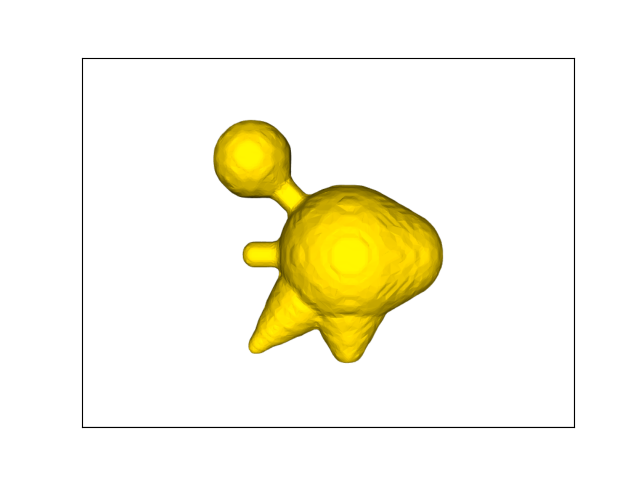

In [8]:
simplified_surface = nppas.decimate_pro(smoothed_surface, fraction=0.5)
simplified_surface

If we simplify the surface too much, we may loose spatial information and resolution. The object may then not be represented appropriately anymore.

(array([[26.206108, 42.87852 , 47.044594],
        [25.50169 , 44.605286, 53.046658],
        [25.496613, 44.702175, 47.20253 ],
        ...,
        [74.60994 , 53.51402 , 53.527515],
        [74.63424 , 54.613785, 47.303745],
        [74.49613 , 55.441647, 52.614532]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    1,    0],
        [   2,    1,    4],
        ...,
        [1893, 1899, 1892],
        [1903, 1893, 1904],
        [1893, 1890, 1904]], dtype=int64))
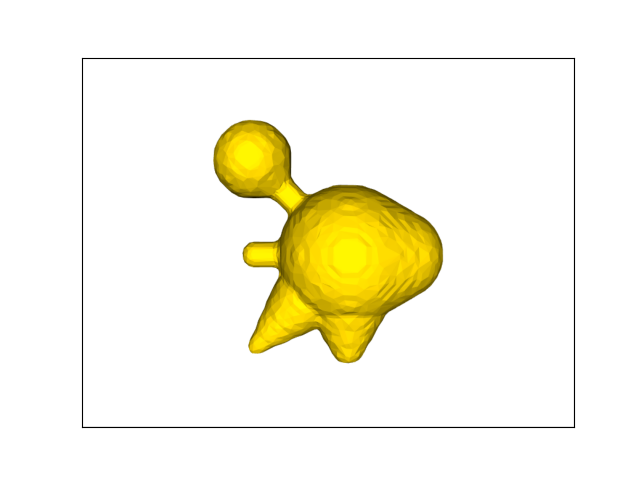

In [9]:
simplified_surface2 = nppas.decimate_quadric(smoothed_surface, fraction=0.1)
simplified_surface2

(array([[26.68893  , 41.386234 , 54.343475 ],
        [25.665216 , 45.986393 , 56.52883  ],
        [25.439806 , 46.50671  , 44.638504 ],
        [25.620443 , 53.69296  , 56.63574  ],
        [26.560661 , 58.396793 , 45.893154 ],
        [28.687128 , 56.69094  , 37.615738 ],
        [27.710701 , 38.450787 , 46.96767  ],
        [27.459593 , 46.988216 , 38.936283 ],
        [28.853188 , 63.422825 , 54.582485 ],
        [29.473408 , 37.64574  , 58.49952  ],
        [29.529612 , 39.74972  , 39.24587  ],
        [29.527447 , 59.589012 , 61.204815 ],
        [31.330425 , 67.32442  , 47.900337 ],
        [31.963932 , 32.075504 , 48.376293 ],
        [32.6859   , 47.521767 , 70.15131  ],
        [31.99785  , 49.04959  , 31.985273 ],
        [34.828728 , 35.343822 , 35.504322 ],
        [36.593826 , 51.56305  , 77.196236 ],
        [34.2901   , 64.27009  , 35.855507 ],
        [35.29054  , 64.950935 , 64.33926  ],
        [35.361217 , 41.162434 , 70.78672  ],
        [37.243984 , 29.662296 , 58.642696 ],
        [35.613735 , 70.32884  , 45.356033 ],
        [35.6032   , 35.159164 , 64.687454 ],
        [36.620796 , 44.947166 , 28.916878 ],
        [37.60989  , 54.86393  , 28.392506 ],
        [37.23822  , 71.04382  , 56.43045  ],
        [39.826775 , 29.319641 , 39.508713 ],
        [38.36143  , 60.007275 , 74.17494  ],
        [36.63893  , 16.344017 , 10.426262 ],
        [36.366825 , 11.261889 , 16.198801 ],
        [36.525665 , 21.1516   , 16.3251   ],
        [37.169502 , 19.666199 , 22.061708 ],
        [38.097126 , 20.731907 ,  9.070139 ],
        [39.36047  , 27.24296  , 46.624763 ],
        [39.973576 , 41.775864 , 77.92608  ],
        [37.64261  , 65.66177  , 33.97162  ],
        [39.64327  , 60.725037 , 29.512444 ],
        [41.45693  , 65.020836 , 70.52576  ],
        [40.94294  , 72.06241  , 39.728542 ],
        [39.39634  ,  9.188879 ,  8.6468   ],
        [39.780582 ,  6.006912 , 15.170123 ],
        [39.696896 ,  8.470722 , 23.03072  ],
        [40.988796 , 26.84663  , 54.401314 ],
        [40.433376 , 38.1792   , 29.723703 ],
        [41.2404   , 46.1259   , 81.393394 ],
        [40.30523  , 77.114944 , 45.647793 ],
        [41.510914 , 16.467228 , 27.564823 ],
        [43.299118 , 13.691551 ,  3.1184416],
        [40.585903 , 26.788107 , 16.351345 ],
        [41.809185 , 35.415157 , 71.49992  ],
        [42.350353 , 58.1487   , 79.94957  ],
        [42.576504 , 81.747215 , 52.84743  ],
        [45.207733 , 25.832605 , 27.28196  ],
        [44.0175   , 70.96445  , 62.76304  ],
        [41.653294 , 75.136604 , 28.59522  ],
        [42.909546 , 77.45251  , 57.702137 ],
        [45.868134 , 53.741474 , 83.54455  ],
        [43.79853  , 57.917538 , 26.803473 ],
        [42.364174 , 70.8033   , 23.716265 ],
        [44.489887 ,  4.0517473, 10.058916 ],
        [45.764526 ,  8.431024 ,  4.349706 ],
        [45.868694 ,  8.705374 , 27.973577 ],
        [43.35615  , 26.499603 ,  8.611046 ],
        [46.547344 , 21.693665 ,  2.8103414],
        [45.221115 , 25.46757  , 44.919884 ],
        [46.16697  , 26.929514 , 59.479393 ],
        [45.642536 , 29.74707  , 34.836777 ],
        [47.14099  , 45.639877 , 25.09559  ],
        [45.27639  , 48.555595 , 24.551157 ],
        [45.004967 ,  2.7245843, 19.429825 ],
        [45.475456 , 28.244535 , 24.310375 ],
        [48.058502 , 32.976463 , 70.89074  ],
        [45.107895 , 78.76306  , 30.81979  ],
        [45.99538  , 88.175735 , 49.117184 ],
        [45.339073 , 29.431232 , 15.284614 ],
        [46.960835 , 40.093826 , 80.787796 ],
        [47.05903  , 66.235985 , 71.87344  ],
        [45.77307  , 79.763794 , 17.817554 ],
        [45.126537 , 80.07256  , 42.6345   ],
        [47.887005 , 22.923447 , 29.671457 ],
        [45.416065 , 33.973    , 30.142605 ],
        [48.41933  , 35.7783   , 28.834436 ],
        [50.998196 , 44.598274 , 83.760216 ],
        [50.837845 , 62.010933 , 79.52458  ],
        [48.012707 , 71.40827  , 19.049572 ],
        [49.10983  , 76.78735  , 39.092693 ]
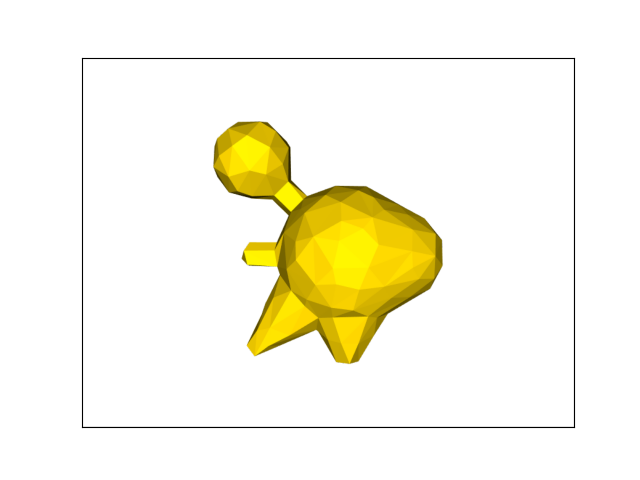

In [10]:
simplified_surface2 = nppas.decimate_quadric(smoothed_surface, fraction=0.01)
simplified_surface2

(array([[33.757137 , 64.358246 , 34.276196 ],
        [25.547668 , 38.82257  , 48.193726 ],
        [30.32451  , 63.011837 , 62.722202 ],
        [42.62229  , 53.57565  , 86.408264 ],
        [33.829075 , 42.52296  , 29.96235  ],
        [38.116444 , 25.642138 , 52.785957 ],
        [50.324127 , 93.10659  , 49.48144  ],
        [47.212494 , 77.502106 , 38.622364 ],
        [46.86817  ,  3.8584783, 27.996782 ],
        [50.192207 , 31.42654  , 29.835615 ],
        [34.178185 , 13.580581 ,  9.847408 ],
        [47.122635 , 25.268085 ,  4.1269727],
        [50.35337  , 50.52534  , 23.139013 ],
        [60.230705 ,  8.142264 ,  3.3798215],
        [57.95781  , 43.667496 , 84.8449   ],
        [49.871075 , 86.83135  , 12.335193 ],
        [68.865906 , 29.205528 , 51.1599   ],
        [61.517162 , 71.63598  , 60.14378  ],
        [62.660267 , 17.478125 , 26.288834 ],
        [63.26116  , 66.56682  , 33.362133 ],
        [67.98476  , 43.71234  , 30.761446 ],
        [75.90502  , 58.62036  , 51.077282 ]], dtype=float32),
 array([[ 0,  1,  2],
        [ 3,  2,  1],
        [ 1,  0,  4],
        [ 1,  5,  3],
        [ 4,  5,  1],
        [ 0,  6,  7],
        [ 6,  0,  2],
        [ 8,  9, 10],
        [ 9, 11, 10],
        [ 5,  4,  9],
        [12,  4,  0],
        [ 8, 10, 13],
        [14,  3,  5],
        [15,  0,  7],
        [ 4, 12,  9],
        [12,  0, 15],
        [11, 13, 10],
        [16, 14,  5],
        [17,  6,  2],
        [ 9,  8, 18],
        [16,  5,  9],
        [ 3, 17,  2],
        [15, 19, 12],
        [19, 15,  7],
        [13, 11,  9],
        [ 6, 19,  7],
        [ 9, 20, 16],
        [12, 20,  9],
        [14, 17,  3],
        [12, 19, 20],
        [ 8, 13, 18],
        [18, 13,  9],
        [19,  6, 17],
        [17, 21, 19],
        [21, 17, 14],
        [19, 21, 20],
        [21, 14, 16],
        [20, 21, 16]], dtype=int64))
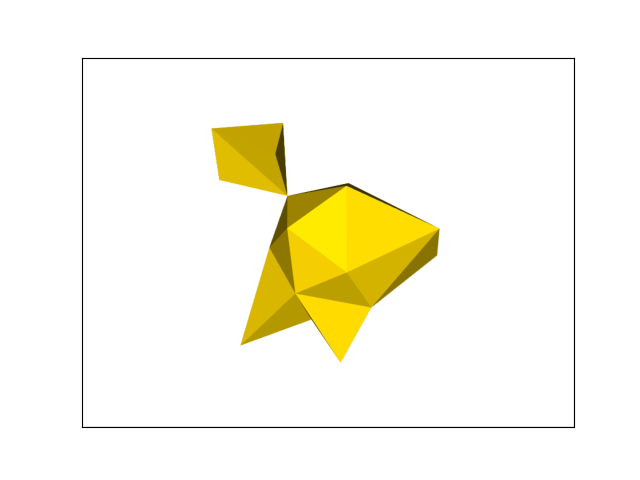

In [11]:
simplified_surface2 = nppas.decimate_quadric(smoothed_surface, fraction=0.001)
simplified_surface2